# Data Cleanup - Tweet Dataset (Darija - Moroccan Dialect)

At this first stage we aim at clean a tweet dataset from Hugging Face (`shmuhammad/AfriSenti-twitter-sentiment`), 
focusing on the Moroccan Darija subset. The goal is to preprocess the text data by removing emojis, usernames,
and applying custom list of Darija stop words. The cleaned data will then be ready for n-gram analysis.

# Part 1: Data Cleaning

In [1]:
# Install Dependencies
%pip install datasets emoji nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load the dataset and filter to focus in Moroccan Darija
from datasets import load_dataset
moroccan_tweets = load_dataset("shmuhammad/AfriSenti-twitter-sentiment", 'arq')

c:\Users\eelhaym\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print('The dataset format is: ', moroccan_tweets.column_names)
print('The number of elements of train subset: ', len(moroccan_tweets['train']))
print('The number of elements of test subset: ', len(moroccan_tweets['test']))
print('The number of elements of validation subset: ', len(moroccan_tweets['validation']))
print('The labels of the dataset are: ', moroccan_tweets['train'].features['label'].names)
print('')
for i in range(3):
    print(moroccan_tweets['train'][i])


The dataset format is:  {'train': ['tweet', 'label'], 'validation': ['tweet', 'label'], 'test': ['tweet', 'label']}
The number of elements of train subset:  1651
The number of elements of test subset:  958
The number of elements of validation subset:  414
The labels of the dataset are:  ['positive', 'neutral', 'negative']

{'tweet': '@user على حسب موقعك يبدو أنك صاحب نظرة ثاقبة .يخي تبهليل . @user', 'label': 2}
{'tweet': '@user تبهليل هاذا', 'label': 2}
{'tweet': '@user هاذي تبهليل ماشي فهامة', 'label': 2}


In [4]:
# Text Processing (Remove emojis, usernames, URLs, Links, special charcters, punctuation, Remove Latin words, conversion to lower case if applicable)
import re
import emoji
def clean_text(row):
    row['tweet'] = re.sub(r'@\w+', '', row['tweet'])  # Remove usernames
    row['tweet'] = re.sub(r'http\S+|www\S+', '', row['tweet'])  # Remove URLs
    row['tweet'] = re.sub(r'\W+', ' ', row['tweet'])  # Remove special characters and punctuation
    row['tweet'] = re.sub(r'\s+', ' ', row['tweet'])  # Normalize whitespace
    row['tweet'] = re.sub(r'[A-Za-z]+', ' ', row['tweet'])  # Remove Latin words
    row['tweet'] = emoji.replace_emoji(row['tweet'], replace='') # Remove emojis
    row['tweet'] = row['tweet'].strip()
    return row

In [5]:
# Applying Text Processing Function

print('Few examples from the train set')
moroccan_tweets = moroccan_tweets.map(clean_text) # This applies the function to the different splits of the dataset at once
for i in range(3):
    print(moroccan_tweets['train'][i])
    print(moroccan_tweets['test'][i])
    print(moroccan_tweets['validation'][i])
    print('')

Few examples from the train set


Map: 100%|██████████| 958/958 [00:00<00:00, 9457.30 examples/s]

{'tweet': 'على حسب موقعك يبدو أنك صاحب نظرة ثاقبة يخي تبهليل', 'label': 2}
{'tweet': 'لاباس الحمدالله يارب العالمين اجمعين  سقسي عليك الخير يارب إسحاق', 'label': 0}
{'tweet': 'ههههههههههههه شوفي تاريخ بلدك بعدها تحدثي عن تاريخ اسيادك حبيبتي انت غ', 'label': 2}

{'tweet': 'تبهليل هاذا', 'label': 2}
{'tweet': 'لمجرب ولا تسقسي الطبيب', 'label': 1}
{'tweet': 'يسموه تبهليل بصح ضحكتني كي ناضت و راحت تجري ل طومبيل ع اساس تم تب', 'label': 2}

{'tweet': 'هاذي تبهليل ماشي فهامة', 'label': 2}
{'tweet': 'عليه الميت لوكان يصيب يعيش و ميخليكش و الحي يتكبر و يلعبها من غير الفراق هذاك حاجة متستاهل تبكي عليها كي تروح من لخ', 'label': 1}
{'tweet': 'في علم النفس ساعة ساعة ترفه على روحك بشوية تبهليل', 'label': 0}



In [ ]:
# Stop Words Removal
# We need a list of darija stop words to do this

In [6]:
# Data Validation (Check for empty/null values, remove duplicate entries, text length)
import pandas as pd

# Conversion to pandas Dataframes
moroccan_tweets_train_df = pd.DataFrame(moroccan_tweets['train'])
moroccan_tweets_test_df = pd.DataFrame(moroccan_tweets['test'])
moroccan_tweets_validation_df = pd.DataFrame(moroccan_tweets['validation'])
print(moroccan_tweets_train_df.head())

# Check for empty values
print(moroccan_tweets_train_df.isnull().sum())
print(moroccan_tweets_test_df.isnull().sum())
print(moroccan_tweets_validation_df.isnull().sum())

# remove duplicates
moroccan_tweets_train_df.drop_duplicates()
moroccan_tweets_test_df.drop_duplicates()
moroccan_tweets_validation_df.drop_duplicates()


                                               tweet  label
0  على حسب موقعك يبدو أنك صاحب نظرة ثاقبة يخي تبهليل      2
1                                        تبهليل هاذا      2
2                             هاذي تبهليل ماشي فهامة      2
3  تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال فيه...      2
4         مرنكة أقسم بالله تبهليل ما بعد منتصف الليل      2
tweet    0
label    0
dtype: int64
tweet    0
label    0
dtype: int64
tweet    0
label    0
dtype: int64


,tweet,label
0,ههههههههههههه شوفي تاريخ بلدك بعدها تحدثي عن ت...,2
1,يسموه تبهليل بصح ضحكتني كي ناضت و راحت تجري ل ...,2
2,في علم النفس ساعة ساعة ترفه على روحك بشوية تبهليل,0
3,باين من قشهم مش عندنا بركا من تبهليل راك كبير ...,2
4,ويفعلوها وجوه البخس مرة اخرى ويقلك وعلاه يكرهو...,2
...,...,...
409,أنا مسامحك ولكن منقدرش ناكل داكشي حلو عليا بزاف,1
410,مات في روحك بزاف,2
411,السلام عليكم وقع لي مشكل كبييير بزاف انا وختي ...,2
412,القنطة كي تكون بزاف تضحك,2


In [7]:
# Longest and shortest tweets on train subset
shortest_tweet = moroccan_tweets_train_df.loc[moroccan_tweets_train_df['tweet'].str.split().str.len().idxmin()]
longest_tweet = moroccan_tweets_train_df.loc[moroccan_tweets_train_df['tweet'].str.split().str.len().idxmax()]
min_len, max_len = len(shortest_tweet['tweet']), len(longest_tweet['tweet'])
print(min_len, max_len)
print(shortest_tweet['tweet'])
print(longest_tweet['tweet'])

4 125
زعما
ايه حتا و أنا قلت هاذي تبقى مسألة شخصية كلها و كيفاش و وقتاش و الطريقة لي تساعدك الزواج بصفة عامة مسألة نسبية و كلها و مكتوبه


# Part 2: N-grams Analysis

In [ ]:
# Install Dependencies
%pip install nltk matplotlib seaborn wordcloud networkx arabic-reshaper python-bidi

In [10]:
# Tokenization

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def Tokenize_fn(tweet):
    return word_tokenize(tweet)

moroccan_tweets_train_df["tweet_tokens"] = moroccan_tweets_train_df['tweet'].apply(Tokenize_fn)
moroccan_tweets_test_df["tweet_tokens"] = moroccan_tweets_test_df['tweet'].apply(Tokenize_fn)
moroccan_tweets_validation_df["tweet_tokens"] = moroccan_tweets_validation_df['tweet'].apply(Tokenize_fn)
moroccan_tweets_train_df.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\eelhaym\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,tweet,label,tweet_token,tweet_tokens
0,على حسب موقعك يبدو أنك صاحب نظرة ثاقبة يخي تبهليل,2,"[على, حسب, موقعك, يبدو, أنك, صاحب, نظرة, ثاقبة...","[على, حسب, موقعك, يبدو, أنك, صاحب, نظرة, ثاقبة..."
1,تبهليل هاذا,2,"[تبهليل, هاذا]","[تبهليل, هاذا]"
2,هاذي تبهليل ماشي فهامة,2,"[هاذي, تبهليل, ماشي, فهامة]","[هاذي, تبهليل, ماشي, فهامة]"
3,تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال فيه...,2,"[تخاف, نجاوب, يا, ناصر, ببلوك, لانو, طريقة, ال...","[تخاف, نجاوب, يا, ناصر, ببلوك, لانو, طريقة, ال..."
4,مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2,"[مرنكة, أقسم, بالله, تبهليل, ما, بعد, منتصف, ا...","[مرنكة, أقسم, بالله, تبهليل, ما, بعد, منتصف, ا..."


In [21]:
# N-gram Generation
from nltk.util import ngrams
from collections import Counter

def generate_ngram(tweet_tokens, n=1):
    ngram_list = ngrams(tweet_tokens, n)
    if n == 1:
        # Flatten unigrams from tuple to string
        return Counter(word[0] for word in ngram_list)
    else:
        return Counter(ngram_list)

# Generating unigrams
moroccan_tweets_train_df["unigrams"] = moroccan_tweets_train_df['tweet_tokens'].apply(lambda tweet_tokens: generate_ngram(tweet_tokens, n=1))
moroccan_tweets_test_df["unigrams"] = moroccan_tweets_test_df['tweet_tokens'].apply(lambda tweet_tokens: generate_ngram(tweet_tokens, n=1))
moroccan_tweets_validation_df["unigrams"] = moroccan_tweets_validation_df['tweet_tokens'].apply(lambda tweet_tokens: generate_ngram(tweet_tokens, n=1))

# Generating bigrams
moroccan_tweets_train_df["bigrams"] = moroccan_tweets_train_df['tweet_tokens'].apply(lambda tweet_tokens: generate_ngram(tweet_tokens, n=2))
moroccan_tweets_test_df["bigrams"] = moroccan_tweets_test_df['tweet_tokens'].apply(lambda tweet_tokens: generate_ngram(tweet_tokens, n=2))
moroccan_tweets_validation_df["bigrams"] = moroccan_tweets_validation_df['tweet_tokens'].apply(lambda tweet_tokens: generate_ngram(tweet_tokens, n=2))

# Generating trigrams
moroccan_tweets_train_df["trigrams"] = moroccan_tweets_train_df['tweet_tokens'].apply(lambda tweet_tokens: generate_ngram(tweet_tokens, n=3))
moroccan_tweets_test_df["trigrams"] = moroccan_tweets_test_df['tweet_tokens'].apply(lambda tweet_tokens: generate_ngram(tweet_tokens, n=3))
moroccan_tweets_validation_df["trigrams"] = moroccan_tweets_validation_df['tweet_tokens'].apply(lambda tweet_tokens: generate_ngram(tweet_tokens, n=3))

moroccan_tweets_train_df.head()




,tweet,label,tweet_token,tweet_tokens,unigrams,bigrams,trigrams
0,على حسب موقعك يبدو أنك صاحب نظرة ثاقبة يخي تبهليل,2,"[على, حسب, موقعك, يبدو, أنك, صاحب, نظرة, ثاقبة...","[على, حسب, موقعك, يبدو, أنك, صاحب, نظرة, ثاقبة...","{'على': 1, 'حسب': 1, 'موقعك': 1, 'يبدو': 1, 'أ...","{('على', 'حسب'): 1, ('حسب', 'موقعك'): 1, ('موق...","{('على', 'حسب', 'موقعك'): 1, ('حسب', 'موقعك', ..."
1,تبهليل هاذا,2,"[تبهليل, هاذا]","[تبهليل, هاذا]","{'تبهليل': 1, 'هاذا': 1}","{('تبهليل', 'هاذا'): 1}",{}
2,هاذي تبهليل ماشي فهامة,2,"[هاذي, تبهليل, ماشي, فهامة]","[هاذي, تبهليل, ماشي, فهامة]","{'هاذي': 1, 'تبهليل': 1, 'ماشي': 1, 'فهامة': 1}","{('هاذي', 'تبهليل'): 1, ('تبهليل', 'ماشي'): 1,...","{('هاذي', 'تبهليل', 'ماشي'): 1, ('تبهليل', 'ما..."
3,تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال فيه...,2,"[تخاف, نجاوب, يا, ناصر, ببلوك, لانو, طريقة, ال...","[تخاف, نجاوب, يا, ناصر, ببلوك, لانو, طريقة, ال...","{'تخاف': 1, 'نجاوب': 1, 'يا': 1, 'ناصر': 1, 'ب...","{('تخاف', 'نجاوب'): 1, ('نجاوب', 'يا'): 1, ('ي...","{('تخاف', 'نجاوب', 'يا'): 1, ('نجاوب', 'يا', '..."
4,مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2,"[مرنكة, أقسم, بالله, تبهليل, ما, بعد, منتصف, ا...","[مرنكة, أقسم, بالله, تبهليل, ما, بعد, منتصف, ا...","{'مرنكة': 1, 'أقسم': 1, 'بالله': 1, 'تبهليل': ...","{('مرنكة', 'أقسم'): 1, ('أقسم', 'بالله'): 1, (...","{('مرنكة', 'أقسم', 'بالله'): 1, ('أقسم', 'بالل..."


In [22]:
# Frequency Analysis 
total_unigrams = Counter()

for row in moroccan_tweets_train_df['unigrams']:
    total_unigrams.update(row)

for row in moroccan_tweets_test_df['unigrams']:
    total_unigrams.update(row)

for row in moroccan_tweets_validation_df['unigrams']:
    total_unigrams.update(row)

print(total_unigrams.most_common(10))  # top 10 unigrams


[('و', 678), ('في', 533), ('علابالي', 445), ('من', 404), ('ما', 303), ('لي', 260), ('مزية', 233), ('على', 230), ('بزاف', 223), ('وعلاه', 210)]


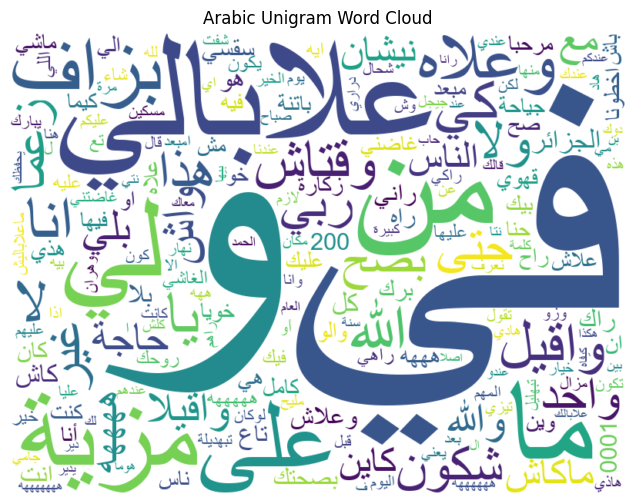

In [23]:
# Visualization and Analysis
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# --- Step 2: Prepare reshaped + bidi-corrected Arabic text
reshaped_freqs = {}
for word, freq in total_unigrams.items():
    reshaped_word = arabic_reshaper.reshape(word)
    bidi_word = get_display(reshaped_word)
    reshaped_freqs[bidi_word] = freq

# --- Step 3: Generate word cloud
wordcloud = WordCloud(font_path='arial',  # Or any TTF Arabic font path if needed
                      background_color='white',
                      width=800,
                      height=600).generate_from_frequencies(reshaped_freqs)

# --- Step 4: Plot it
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Arabic Unigram Word Cloud")
plt.show()